In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/Advertising.csv")
data.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
data.sample(5)

,Unnamed: 0,TV,radio,newspaper,sales
130,131,0.7,39.6,8.7,1.6
152,153,197.6,23.3,14.2,16.6
87,88,110.7,40.6,63.2,16.0
17,18,281.4,39.6,55.8,24.4
139,140,184.9,43.9,1.7,20.7


In [5]:
data.shape

(200, 5)

In [6]:
data.isna().sum().sum()

0

In [7]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df=data.drop(['Unnamed: 0'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

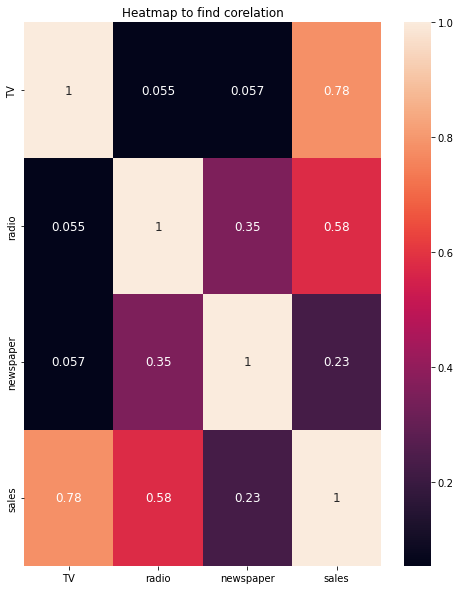

In [9]:
corr=df.corr().abs()
plt.figure(figsize=(8,10))
sns.heatmap(corr,annot=True,annot_kws={'size':12})
plt.title("Heatmap to find corelation")
plt.show
#Plotting  a heatmap to check correlation..

In [10]:
#Tv has high corealtion with sales..

In [11]:
corr=df.corr()
corr["sales"].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

In [12]:
import warnings
warnings.filterwarnings('ignore')

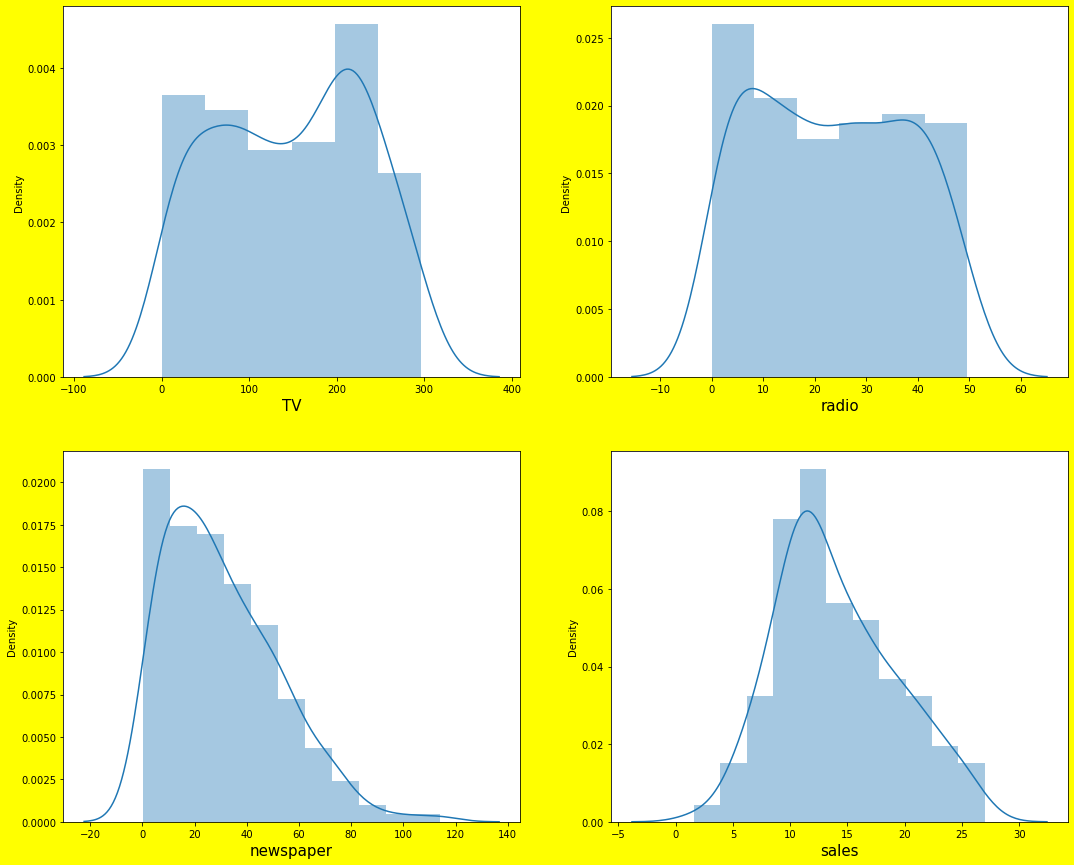

In [13]:
plt.figure(figsize=(18,15),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber <=  4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()    
        

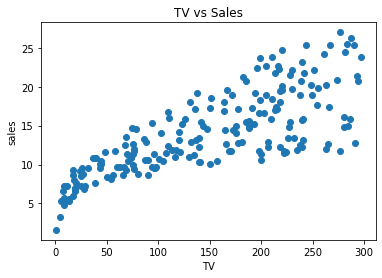

In [14]:
plt.scatter(df.TV,df.sales)
plt.xlabel('TV')
plt.ylabel('sales')
plt.title("TV vs Sales")
plt.show()
# having high +ve corelation with Slaes, so we can invest in Tv...

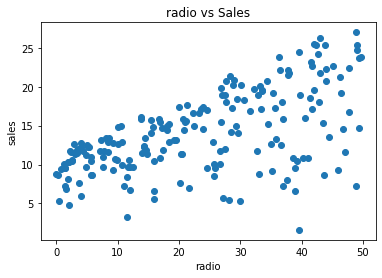

In [15]:
plt.scatter(df.radio,df.sales)
plt.xlabel('radio')
plt.ylabel('sales')
plt.title("radio vs Sales")
plt.show()
#Radio shows+ve corelation,So we can invest in Radio...

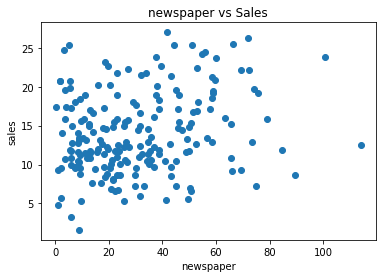

In [16]:
plt.scatter(df.newspaper,df.sales)
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.title("newspaper vs Sales")
plt.show()
#It has both +ve and -ve corelation..

In [17]:
#Taking TV as features and label as a Sales..
x=df[['TV','radio','newspaper']]
y=df[['sales']]

In [18]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


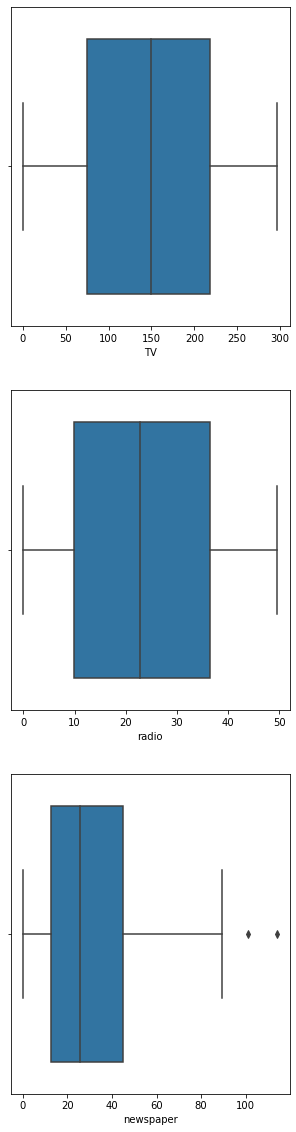

In [20]:
plt.figure(figsize=(5,20))
graph=1
for column in x:
    if graph <= 3:
        ax=plt.subplot(3,1,graph)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=10)
    graph += 1
plt.show()    

        

In [21]:
#importing Linear Regression..
from sklearn.linear_model import LinearRegression

In [22]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [23]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [25]:
scalar=StandardScaler()

In [26]:
X_scaled=scalar.fit_transform(x)
X_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

# train and test

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=49)
y_train.head()

,sales
156,15.3
11,17.4
96,11.7
84,21.7
141,19.2


# linear regression

In [28]:
regression=LinearRegression()

In [29]:
regression.fit(x_train,y_train)

LinearRegression()

In [30]:
df.tail(2)

,TV,radio,newspaper,sales
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [31]:
print('sales :',regression.predict(scalar.transform([[232.1,8.6,8.7]])))

sales : [[15.33242445]]


In [32]:
#Model confidence is
regression.score(x_train,y_train)

0.9207934101214614

In [33]:
regression.score(x_test,y_test)

0.8049578006977757

# model prediction

In [34]:
y_pred=regression.predict(x_test)
y_pred

array([[ 6.93767387],
       [ 9.95762498],
       [20.60154606],
       [ 5.14752775],
       [18.34469069],
       [ 7.74175894],
       [18.56292524],
       [10.58468374],
       [23.49335762],
       [ 8.71345994],
       [ 5.80825475],
       [ 8.96533852],
       [12.21800609],
       [12.12709499],
       [21.4169141 ],
       [ 8.74503639],
       [13.99837567],
       [12.05481016],
       [16.93538264],
       [ 8.31523698],
       [16.69113715],
       [ 7.66084184],
       [16.33878284],
       [ 9.74664833],
       [15.1607852 ],
       [20.0605761 ],
       [12.09938892],
       [10.3210811 ],
       [20.86849771],
       [ 9.96519634],
       [ 6.44640565],
       [16.18012509],
       [11.06041367],
       [17.51908674],
       [ 6.39966194],
       [14.85341252],
       [ 3.27284472],
       [15.5432146 ],
       [21.44917753],
       [11.65295422],
       [15.4823182 ],
       [18.20930959],
       [13.85008537],
       [19.22836577],
       [15.22433805],
       [14

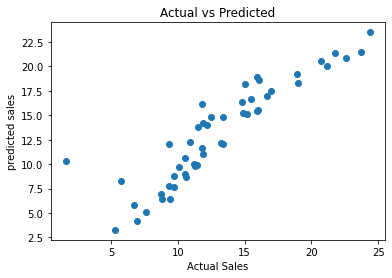

In [35]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('predicted sales')
plt.title('Actual vs Predicted')
plt.show()

# avoiding errors

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [37]:
y_pred=regression.predict(x_test)

# MAE

In [38]:
mean_absolute_error(y_test,y_pred)

1.6404775974592791

# MSE

In [39]:
mean_squared_error(y_test,y_pred)

4.6557891458708225

# RMSE

In [40]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.1577277738099454

# Lasso()

In [41]:
from sklearn.linear_model import Ridge,Lasso,LassoCV

In [42]:
lasscv= LassoCV(alphas=None,max_iter=100,normalize=True)

In [43]:
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [44]:
alpha=lasscv.alpha_
alpha

0.006477437741841645

In [45]:
lasso_reg=Lasso(alpha)

In [46]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.006477437741841645)

In [47]:
lasso_reg.score(x_train,y_train)

0.9207873435025997

# AdaBoostRegressor

In [48]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

In [49]:
abr= AdaBoostRegressor()


In [50]:
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [51]:
y_pred=abr.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)

In [52]:
print('R square score', accuracy)

R square score 0.9790298846717695


In [53]:
x_test.shape

(50, 3)

In [54]:
y_test_pred=abr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)

In [55]:
print('R square score', accuracy)

R square score 0.9387615610431291


# randomized search CV

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
params={'n_estimators':[7,21,40],'learning_rate':[0.25,0.30]}

In [58]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [59]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3],
                                        'n_estimators': [7, 21, 40]})

In [60]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.3, n_estimators=40)

In [61]:
abr=AdaBoostRegressor(learning_rate=0.3,n_estimators=40)
abr.fit(x_train,y_train)
y_pred=abr.predict(x_test)
print('****accuracy post tuning****')
print(metrics.r2_score(y_test,y_pred))

****accuracy post tuning****
0.9143969852537732
